# <center> Module 7 Homework
#### <center> ISE-529, Fall 2021
#### <center> Haotian Liang
#### <center> Due:  November 15, 2021

In [213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from math import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time

1)  For this problem, we are going to do a similar analysis for the lasso as was done in the lecture for the ridge regression.  (40 points total)

As done in lecture, we read the Hitters.csv data into a dataframe, drop the rows with NaNs, and create dummy variables to replace the three category columns.  Use the same array of 100 possible values of lambdas from $10^{-2}$ to $10^{10}$ that we used in the class example:

In [2]:
lambdas = 10**np.linspace(10, -2, 100)
d0 = pd.read_csv('Hitters.csv').dropna()
y = d0['Salary']
x0 = d0.drop(['Salary'], axis=1)
X = pd.get_dummies(x0, columns = ['League', 'Division', 'NewLeague'], drop_first=True)

a)  Following the class example, create a plot of lasso coefficients as a function of lambda.  Use the full dataset.  (5 points)

In [3]:
model = Lasso(max_iter = 10000, normalize = True)
coefs = []

In [4]:
for i in lambdas:
    model.set_params(alpha = i)  # SKLearn Ridge model uses alpha, not lambda
    model.fit(scale(X), y)
    coefs.append(model.coef_)

In [5]:
coefs[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0., -0.])

In [6]:
model1_coefs = pd.DataFrame(coefs)
model1_coefs.columns = X.columns
model1_coefs.index = lambdas
model1_coefs.index.name = 'lambda'
model1_coefs.round(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
lambda,,,,,,,,,,,,,,,,,,,
1.000000e+10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
7.564633e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
5.722368e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
4.328761e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
3.274549e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-291.843,326.118,21.327,-45.214,-8.534,128.422,-26.820,-244.621,0.000,0.0,446.227,225.351,-207.371,79.137,47.329,-20.183,26.991,-57.975,-8.135
2.310130e-02,-291.586,328.297,24.723,-48.286,-12.518,129.894,-24.247,-282.489,29.282,0.0,450.337,228.549,-208.279,79.067,48.971,-20.713,28.095,-58.083,-9.230
1.747528e-02,-291.371,329.925,27.294,-50.603,-15.534,131.002,-22.289,-311.271,51.571,-0.0,453.413,230.973,-208.949,79.012,50.215,-21.115,28.931,-58.164,-10.061


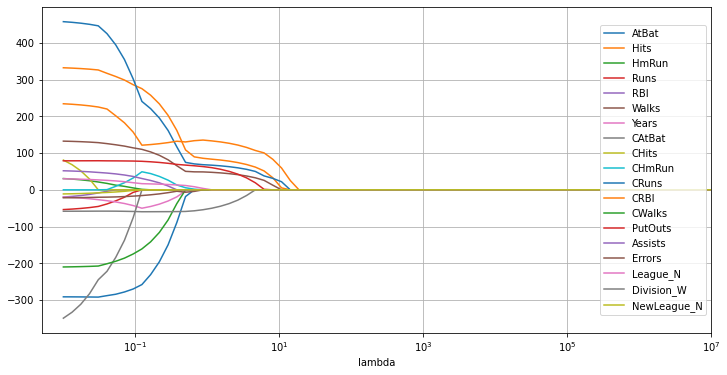

In [7]:
model1_coefs.plot(figsize=(12,6), grid=True, logx=True, xlim = (0.01/2, 10**7))
plt.legend(loc='right')

b)  Using the LassoCV function, find the best possible lambda value for your dataset and the MSE associated with that model.  (10 points)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state=1)


In [9]:
lassocv = LassoCV(alphas = lambdas, cv = 10, max_iter = 100000, normalize = True,random_state=1)
lassocv.fit(X_train, y_train)
print('best possible lambda value',lassocv.alpha_)
mse2a = mean_squared_error(y_test, lassocv.predict(X_test))
print('MSE is ',mse2a)

best possible lambda value 2.656087782946684
MSE is  105162.14640546276


c)  For the lasso model with the best lambda, which coefficients have been driven to 0?  (5 points)

In [10]:
modle_12 = model = Lasso(alpha = lassocv.alpha_, max_iter = 10000, normalize = True,random_state=1)
modle_12.fit(X_train, y_train)
model2_co = pd.DataFrame(modle_12.coef_, columns = ['coefficients'])
model2_co.index = X.columns 
model2_co.index.name = "var"
model2_co

,coefficients
var,
AtBat,0.000000
Hits,1.060001
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,2.859445
Years,0.000000
CAtBat,0.000000
CHits,0.000000


In [11]:
model2_co[model2_co['coefficients']==0].count()

coefficients    13
dtype: int64

d)  Fit a lasso model to this data using a lambda value of 5.  For this model, which coefficients have been driven to 0?  (5 points)

In [12]:
modle_13 = model = Lasso(alpha = 5, max_iter = 10000, normalize = True,random_state=1)
modle_13.fit(X_train, y_train)
model3_co = pd.DataFrame(modle_13.coef_, columns = ['coefficients '])
model3_co.index = X.columns 
model3_co.index.name = "var"
model3_co

,coefficients
var,
AtBat,0.000000
Hits,0.626274
HmRun,0.000000
Runs,0.000000
RBI,0.572260
Walks,2.415726
Years,0.000000
CAtBat,0.000000
CHits,0.000000


In [13]:
model3_co[model2_co['coefficients']==0].count()

coefficients     13
dtype: int64

e)  Which of these two models (best lambda and lambda = 5) had more coefficients driven to 0?  Explain why that happened.  (5 points)

  - xxx

2)  For this probem, we are going to perform a best subset selection using the same dataset as in problem 1.  (60 points total)

a)  How many different combinations of 5 predictors are there in this dataset?  (5 points)

In [14]:
print(comb(19,5))

11628


b)  Using the statsmodel OLS model, fit a regression model to the first 5 predictors ('AtBat', 'Hits', 'HmRun', 'Runs', 'RBI').  What is the RSS of your resulting model (using the full dataset)?  (10 points)

In [76]:
data = pd.DataFrame(d0['AtBat'], columns = ['AtBat'])
data['Hits'] = d0['Hits']
data['HmRun'] = d0['HmRun']
data['Runs'] = d0['Runs']
data['RBI'] = d0['RBI']
data

,AtBat,Hits,HmRun,Runs,RBI
1,315,81,7,24,38
2,479,130,18,66,72
3,496,141,20,65,78
4,321,87,10,39,42
5,594,169,4,74,51
...,...,...,...,...,...
317,497,127,7,65,48
318,492,136,5,76,50
319,475,126,3,61,43
320,573,144,9,85,60


In [93]:
data=sm.add_constant(data)
ols = sm.OLS(y,data)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     16.60
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           3.37e-14
Time:                        21:05:10   Log-Likelihood:                -1943.3
No. Observations:                 263   AIC:                             3899.
Df Residuals:                     257   BIC:                             3920.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.0973     75.752      2.166      0.031      14.923     313.271
AtBat         -1.8023      0.649     -2.779      0.006      -3.080      -0.525
Hits           6.3090      2.359      2.674      0.008       1.663      10.955
HmRun         -3.4315      6.425     -0.534      0.594     -16.085       9.222
Runs           2.0385      2.654      0.768      0.443      -3.187       7.264
RBI            6.7458      2.822      2.390      0.018       1.188      12.303
==============================================================================
Omnibus:                       78.718   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.749
Skew:                           1.328   Prob(JB):                     4.27e-49
Kurtosis:                       6.643   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
RSS = ols.fit().ssr

In [95]:
print(RSS)

40305704.0525259


c)  The itertools package provides a variety of "iterators" for use in loops.  The combinations iterator provides an iterator that can be used in for loops, For example, here is the list of all of the combinations of 3 predictors in our dataset:

In [191]:
from itertools import combinations
for predictor_comb in combinations(X.columns, 3):
    print(predictor_comb)

('AtBat', 'Hits', 'HmRun')
('AtBat', 'Hits', 'Runs')
('AtBat', 'Hits', 'RBI')
('AtBat', 'Hits', 'Walks')
('AtBat', 'Hits', 'Years')
('AtBat', 'Hits', 'CAtBat')
('AtBat', 'Hits', 'CHits')
('AtBat', 'Hits', 'CHmRun')
('AtBat', 'Hits', 'CRuns')
('AtBat', 'Hits', 'CRBI')
('AtBat', 'Hits', 'CWalks')
('AtBat', 'Hits', 'PutOuts')
('AtBat', 'Hits', 'Assists')
('AtBat', 'Hits', 'Errors')
('AtBat', 'Hits', 'League_N')
('AtBat', 'Hits', 'Division_W')
('AtBat', 'Hits', 'NewLeague_N')
('AtBat', 'HmRun', 'Runs')
('AtBat', 'HmRun', 'RBI')
('AtBat', 'HmRun', 'Walks')
('AtBat', 'HmRun', 'Years')
('AtBat', 'HmRun', 'CAtBat')
('AtBat', 'HmRun', 'CHits')
('AtBat', 'HmRun', 'CHmRun')
('AtBat', 'HmRun', 'CRuns')
('AtBat', 'HmRun', 'CRBI')
('AtBat', 'HmRun', 'CWalks')
('AtBat', 'HmRun', 'PutOuts')
('AtBat', 'HmRun', 'Assists')
('AtBat', 'HmRun', 'Errors')
('AtBat', 'HmRun', 'League_N')
('AtBat', 'HmRun', 'Division_W')
('AtBat', 'HmRun', 'NewLeague_N')
('AtBat', 'Runs', 'RBI')
('AtBat', 'Runs', 'Walks')
('AtB

(15 points)  Using this tool, construct a loop that fits an OLS model to every possible combination of three predictors.  Save the model and its RSS in a dataframe called "results".  Find the best model(lowest RSS) and answer the following questions:
  - What are the predictors?
  - What is the $R^{2}$ of the model?

In [192]:
preditctor=[]
results=[]
for predictor_comb in combinations(X.columns, 3):
    (first, second, third)  = predictor_comb
    preditctor.append(predictor_comb)
    q= pd.DataFrame()
    q[first] = X[first]
    q[second] = X[second]
    q[third] = X[third]
    q=sm.add_constant(q)
    ols = sm.OLS(y,q)
    ssr=ols.fit().ssr
    results.append(ssr)

In [193]:
results

[41209153.23783225,
 42187760.90690409,
 40407139.833423495,
 38613146.710974954,
 34329981.22907825,
 31738026.10354771,
 31291671.119278885,
 30927889.433651023,
 30455651.93301327,
 29824793.037840948,
 31875349.950679906,
 40611129.018820256,
 41986591.55076822,
 41780851.66531849,
 42321632.74728247,
 41302145.379043914,
 42379704.98855683,
 43282630.73155764,
 42193340.06837305,
 40916937.19925569,
 36138508.771584466,
 33553664.92252649,
 32637586.01250877,
 33910125.423269354,
 32287887.93811327,
 32107649.419689357,
 34380988.475784674,
 42222743.51245754,
 43661847.574727535,
 43195461.58931269,
 43544460.46112553,
 42287602.20855308,
 43630654.440180555,
 41835361.130020134,
 41460071.21969543,
 35127898.02729957,
 32579281.923979115,
 31745508.546936046,
 33527211.49717866,
 31805338.69213013,
 31000940.02592898,
 34054352.38446232,
 41911341.953632675,
 43547952.482547425,
 43207277.775832176,
 43570026.009342134,
 42599707.41661075,
 43654395.37685946,
 39743383.20364354,

In [194]:
e=pd.DataFrame()
e['results']=results
e['preditctor']=preditctor
e['index']= list(range(0,e['results'].count(),1))
e

,results,preditctor,index
0,4.120915e+07,"(AtBat, Hits, HmRun)",0
1,4.218776e+07,"(AtBat, Hits, Runs)",1
2,4.040714e+07,"(AtBat, Hits, RBI)",2
3,3.861315e+07,"(AtBat, Hits, Walks)",3
4,3.432998e+07,"(AtBat, Hits, Years)",4
...,...,...,...
964,5.131606e+07,"(Assists, Division_W, NewLeague_N)",964
965,5.133040e+07,"(Errors, League_N, Division_W)",965
966,5.328883e+07,"(Errors, League_N, NewLeague_N)",966
967,5.134093e+07,"(Errors, Division_W, NewLeague_N)",967


In [195]:
o = e['results'].min()

In [196]:
e_new=e.loc[e['results']==o]
e_new

,results,preditctor,index
262,2.924930e+07,"(Hits, CRBI, PutOuts)",262


In [197]:
preditctor[262]

('Hits', 'CRBI', 'PutOuts')

In [116]:
q= pd.DataFrame()
(first, second, third)  = preditctor[262]
q[first] = X[first]
q[second] = X[second]
q[third] = X[third]
q=sm.add_constant(q)
ols = sm.OLS(y,q)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     71.05
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.48e-33
Time:                        21:15:40   Log-Likelihood:                -1901.1
No. Observations:                 263   AIC:                             3810.
Df Residuals:                     259   BIC:                             3825.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.4592     55.203     -1.294      0.197    -180.163      37.244
Hits           2.8038      0.492      5.695      0.000       1.834       3.773
CRBI           0.6825      0.066     10.366      0.000       0.553       0.812
PutOuts        0.2736      0.078      3.517      0.001       0.120       0.427
==============================================================================
Omnibus:                      114.741   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.018
Skew:                           1.612   Prob(JB):                    1.85e-164
Kurtosis:                      10.643   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-square is 0.451

d)  Now, use your code to create a function get_best_model(k) which takes the number of predictors as an input (k) and returns a list consisting of the statsmodels model and its corresponding RSS for the best model with k predictors.  Call the function with k = 3 to test that it returns the same results as your answer to part d. (10 points)

In [208]:
def get_best_model(k):
    models = None
    rss = 1e+100
    for predictor_comb in combinations(X.columns, k):
        x = X[list(predictor_comb)] 
        y = d0['Salary']
        x = sm.add_constant(x) 
        model = sm.OLS(y, x).fit() 
        RSS = model.ssr
        if RSS < rss: 
            rss = RSS
            models = model 
    return [models, models.ssr]
get_best_model(3)

    
      

 29249296.855867315]

e)  Set up a loop to call this function for every number of susbsets between 1 and 19 and store the results in a dataframe called models_best.  This will take a long time to run (about 17 minutes on my computer), so I recommend that you test it using only a relatively small number of subsets (maybe 1 to 5) before running it on the full 19.  Display the results of your best model with 3 predictors (using "models_best.loc[3, 'model'].summary") (10 points)

In [214]:
start = time.time()
models_best = pd.DataFrame(columns =['model', 'RSS']) 
model_set = []
RSS_set = []
no_of_predictors = list(range(1,20))
for i in no_of_predictors:
    best_model, best_rss = get_best_model(i) 
    model_set.append(best_model) 
    RSS_set.append(best_rss)
models_best['model'] = model_set 
models_best['RSS'] = RSS_set 
print(models_best)
print(models_best.loc[2, 'model'].summary())
end = time.time() 
print(end - start)

                                                model           RSS
0   <statsmodels.regression.linear_model.Regressio...  3.617968e+07
1   <statsmodels.regression.linear_model.Regressio...  3.064656e+07
2   <statsmodels.regression.linear_model.Regressio...  2.924930e+07
3   <statsmodels.regression.linear_model.Regressio...  2.797085e+07
4   <statsmodels.regression.linear_model.Regressio...  2.714990e+07
5   <statsmodels.regression.linear_model.Regressio...  2.619490e+07
6   <statsmodels.regression.linear_model.Regressio...  2.590655e+07
7   <statsmodels.regression.linear_model.Regressio...  2.513693e+07
8   <statsmodels.regression.linear_model.Regressio...  2.481405e+07
9   <statsmodels.regression.linear_model.Regressio...  2.450040e+07
10  <statsmodels.regression.linear_model.Regressio...  2.438735e+07
11  <statsmodels.regression.linear_model.Regressio...  2.433323e+07
12  <statsmodels.regression.linear_model.Regressio...  2.428915e+07
13  <statsmodels.regression.linear_model.Regress

f)  Create and populate a dataframe best_model_stats that has the following columns:  "Model Size", "R2", "Adjusted R2", "AIC", "BIC"  (5 points)

In [217]:
best_model_st = pd.DataFrame(columns =["Model Size", "Model"]) 
best_model_st['Model Size'] = list(range(1,20)) 
best_model_st['Model'] = models_best['model']
r2, adj_r2, aic, bic = [], [], [], []
for _ in best_model_st['Model']: 
    r2.append(_.rsquared) 
    adj_r2.append(_.rsquared_adj) 
    aic.append(_.aic) 
    bic.append(_.bic)
best_model_st['R2'] = r2
best_model_st['Adjusted R2'] = adj_r2 
best_model_st['AIC'] = aic
best_model_st['BIC'] = bic
best_model_st = best_model_st.drop(['Model'], axis=1) 
best_model_st

,Model Size,R2,Adjusted R2,AIC,BIC
0,1,0.321450,0.318850,3862.139307,3869.283615
1,2,0.425224,0.420802,3820.487305,3831.203767
2,3,0.451429,0.445075,3810.214440,3824.503056
3,4,0.475407,0.467273,3800.460294,3818.321064
4,5,0.490804,0.480897,3794.625624,3816.058548
5,6,0.508715,0.497200,3787.208000,3812.213078
6,7,0.514123,0.500785,3786.296813,3814.874046
7,8,0.528557,0.513708,3780.365349,3812.514735
8,9,0.534612,0.518057,3778.965286,3814.686826
9,10,0.540495,0.522261,3777.619775,3816.913469


g)  Create four line plots showing the four assessment statistics as a function of model size  (5 points)

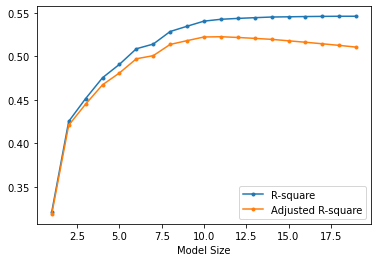

In [218]:
plt.plot(best_model_stats['Model Size'], r2, '.-', label='R-square') 
plt.plot(best_model_stats['Model Size'], adj_r2, '.-', label='Adjusted R-square') 
plt.xlabel('Model Size')
plt.legend()

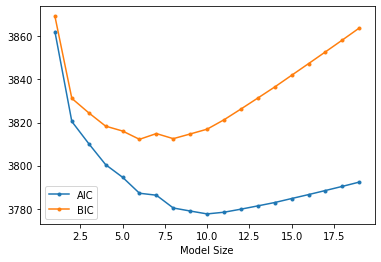

In [219]:
plt.plot(best_model_stats['Model Size'], aic, '.-', label='AIC') 
plt.plot(best_model_stats['Model Size'], bic, '.-', label='BIC') 
plt.xlabel('Model Size')
plt.legend()

h.  Based on this data, which model size would you select for each of the three assessment statistics (not including R2)?   (5 points)

In [220]:
best_index_adj = best_model_stats['Adjusted R2'].idxmax(1) 
best_index_aic = best_model_stats['AIC'].idxmin(1) 
best_index_bic = best_model_stats['BIC'].idxmin(1) 
print(best_index_adj+1, best_index_aic+1, best_index_bic+1)

11 10 6


  - Adjusted $R^{2}$:  11
  - AIC:  10
  - BIC:  6

i.  How does this compare to the number of predictors using the Lassoo "best model" that you found in question 1?  (5 points)

  - Use lasso,for lambad is 5. then use 6 paramters. finally use BIC assess